In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
## Defining the parameters involved in the system ##
alpha = 0.063
beta = 0.13
gamma = 0.02
Ec= 0.06
Dm = 0.0025
Dc = 10

In [3]:
## Discretising space and time ##
size = 20  # size of the 2D grid
dx = 6. /size  # space step
T = 200.0  # total time
dt = 0.002 # time step
n = int(T / dt)  # number of iterations

In [4]:
## Random initialisation of our variable X and Y ##
X = np.random.rand(size, size)
Y = np.random.rand(size, size)

In [5]:
## Computing discrete Laplace operator of a 2D variable on the grid, using five-point stencil finite difference method ##
def laplacian(Z):
    Ztop = Z[0:-2, 1:-1]
    Zleft = Z[1:-1, 0:-2]
    Zbottom = Z[2:, 1:-1]
    Zright = Z[1:-1, 2:]
    Zcenter = Z[1:-1, 1:-1]
    return (Ztop + Zleft + Zbottom + Zright -
            4 * Zcenter) / dx**2

In [6]:
## Defining the function that captures the patterns in our matrix ##
def show_patterns(U, ax=None):
    ax.imshow(U, cmap=plt.cm.copper,
              interpolation='bilinear',
              extent=[-1, 1, -1, 1])
    ax.set_axis_off()

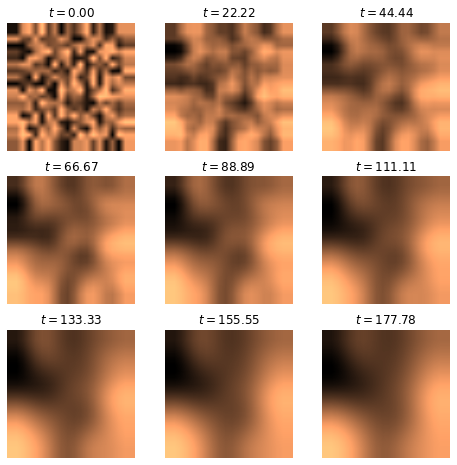

In [7]:
fig, axes = plt.subplots(3, 3, figsize=(8, 8))
step_plot = n // 9
# We simulate the PDE with the finite difference
# method.
for i in range(n):
    # We compute the Laplacian of X and Y.
    deltaX = laplacian(X)
    deltaY = laplacian(Y)
    # We take the values of X and Y inside the grid.
    Xc = X[1:-1, 1:-1]
    Yc = Y[1:-1, 1:-1]
    # We update the variables.
    X[1:-1, 1:-1], Y[1:-1, 1:-1] = \
        Xc + dt * (Ec * alpha * Xc**2 * Yc + Ec * beta * Xc * Yc - gamma * Xc + Dm * deltaX),\
        Yc + dt * (gamma * Xc - Ec * alpha * Xc**2 * Yc + Dc * deltaY)
    # Neumann conditions: derivatives at the edges
    # are null.
    for Z in (X, Y):
        Z[0, :] = Z[1, :]
        Z[-1, :] = Z[-2, :]
        Z[:, 0] = Z[:, 1]
        Z[:, -1] = Z[:, -2]

    # We plot the state of the system at
    # 9 different times.
    if i % step_plot == 0 and i < 9 * step_plot:
        ax = axes.flat[i // step_plot]
        show_patterns(X, ax=ax)
        ax.set_title(f'$t={i * dt:.2f}$')